In [1]:
import pandas as pd
import missingno as msno
from matplotlib.pyplot import plot
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('./event-data-from-20230608-to-20240606.csv')
data_active_users = pd.read_csv('./active-users.csv')

# Utils

In [1]:
def remove_columns_with_no_data(df: pd.DataFrame, coef_to_drop = 1.0):
    columns = df.columns
    dropped_columns = []
    for col in columns:
        per_of_missing_data = df[col].isna().sum() / len(df)
        if per_of_missing_data == coef_to_drop:
            dropped_columns.append(col)
            df = df.drop(columns=[col])
    return df, dropped_columns

def remove_not_useful_columns(df: pd.DataFrame, columns: list[str] = ['Event UUID', 'Invitee UUID', 'Invitee accepted marketing emails', 
                                                            'Invitee Last Name', 'User Name', 'Question 1', 'Response 1', 
                                                            'Marked as No-Show']):
    df = df.copy()
    return df.drop(columns=columns)



NameError: name 'pd' is not defined

In [4]:
def plot_distribution(df, x='start_hour_minute', y='percentage', title='Default title', x_label='x label', y_label='y label') -> None:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=x, y=y, data=df, palette='viridis', hue=x, legend=False)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)

    # # Add values up to each bar
    # for index, row in time_counts.iterrows():
    #     ax.text(row.name, row['percentage'], f"{row['percentage']}%", color='black', ha="center")

    plt.tight_layout()
    plt.show()

In [5]:
def convert_to_datetime_format(df, columns: list, format='%Y-%m-%d %H:%M'):
    df = df.copy()  # Make a copy to avoid SettingWithCopyWarning
    for col in columns:
        df[col] = pd.to_datetime(df[col], format=format)
    return df


# Preprocess
1. Remove columns with 100% missing data

In [6]:
processed_data, dropped_colummns = remove_columns_with_no_data(data)
print(f"Dropped columns : {dropped_colummns}")
# msno.matrix(processed_data)

Dropped columns : ['Team', 'UTM Campaign', 'UTM Source', 'UTM Medium', 'UTM Term', 'UTM Content', 'Salesforce UUID', 'Event Price', 'Payment Currency', 'Guest Email(s)', 'Invitee Reconfirmed', 'Meeting Notes', 'Scheduling method']


#  Distribution of Training Time Beginning

### Only happened events during whole year

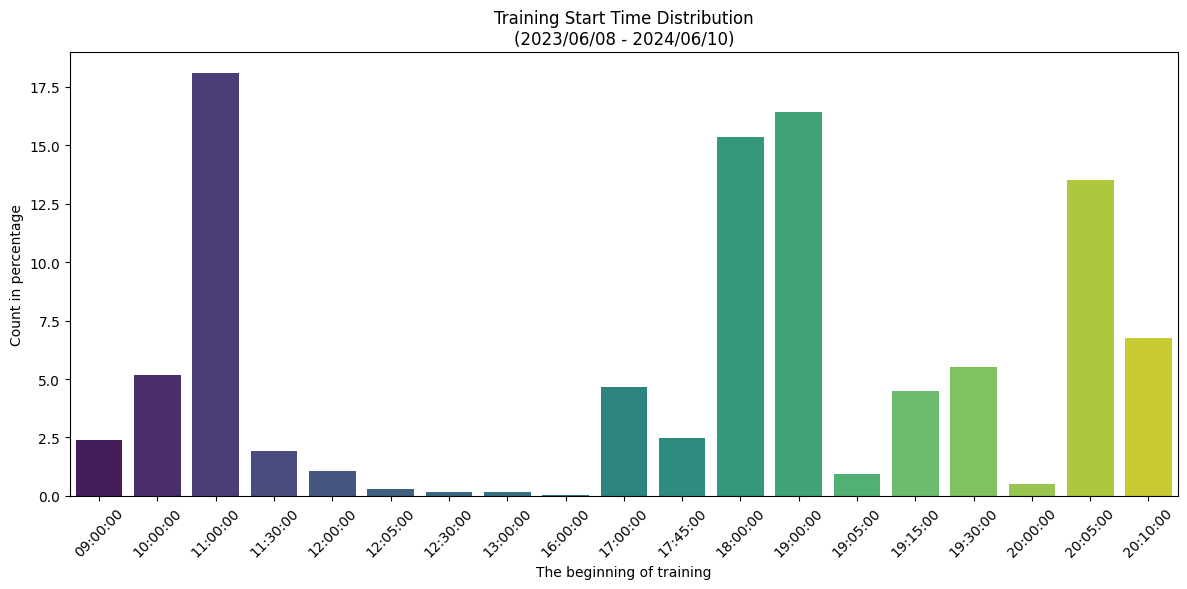

In [25]:
only_happened_events = processed_data[processed_data['Canceled'] == False]
only_happened_events = convert_to_datetime_format(only_happened_events, ['Start Date & Time'])

training_time = pd.DataFrame(index = only_happened_events.index)

training_time['start_hour_minute'] = only_happened_events['Start Date & Time'].dt.time
time_counts = pd.DataFrame(training_time['start_hour_minute'].value_counts().sort_index())
total_events = time_counts['count'].sum()
time_counts['percentage'] = round(time_counts['count'] / total_events * 100, 2)


plot_distribution(time_counts, x='start_hour_minute', y='percentage', title='Training Start Time Distribution\n(2023/06/08 - 2024/06/10)',
                  x_label='The beginning of training', y_label='Count in percentage')

### Season Distribution

In [27]:
processed_data = convert_to_datetime_format(processed_data, ['Start Date & Time'])
training_time_sorted = processed_data.sort_values(by='Start Date & Time')
training_time_sorted['start_event_date'] = training_time_sorted['Start Date & Time'].dt.date 

summer_start = pd.Timestamp('2023-06-07')
autumn_start = pd.Timestamp('2023-08-31')
winter_start = pd.Timestamp('2023-11-30')
spring_start = pd.Timestamp('2024-02-29')
max_value = pd.Timestamp('2024-05-31')

# Categorize the data into seasons
data['season'] = pd.cut(training_time_sorted['start_event_date'], 
                        bins=[summer_start, autumn_start, winter_start, spring_start, max_value],
                        labels=['summer', 'autumn', 'winter', 'spring'])

summer = data[data['season'] == 'summer']
autumn = data[data['season'] == 'autumn']
winter = data[data['season'] == 'winter']
spring = data[data['season'] == 'spring']



#### Summer

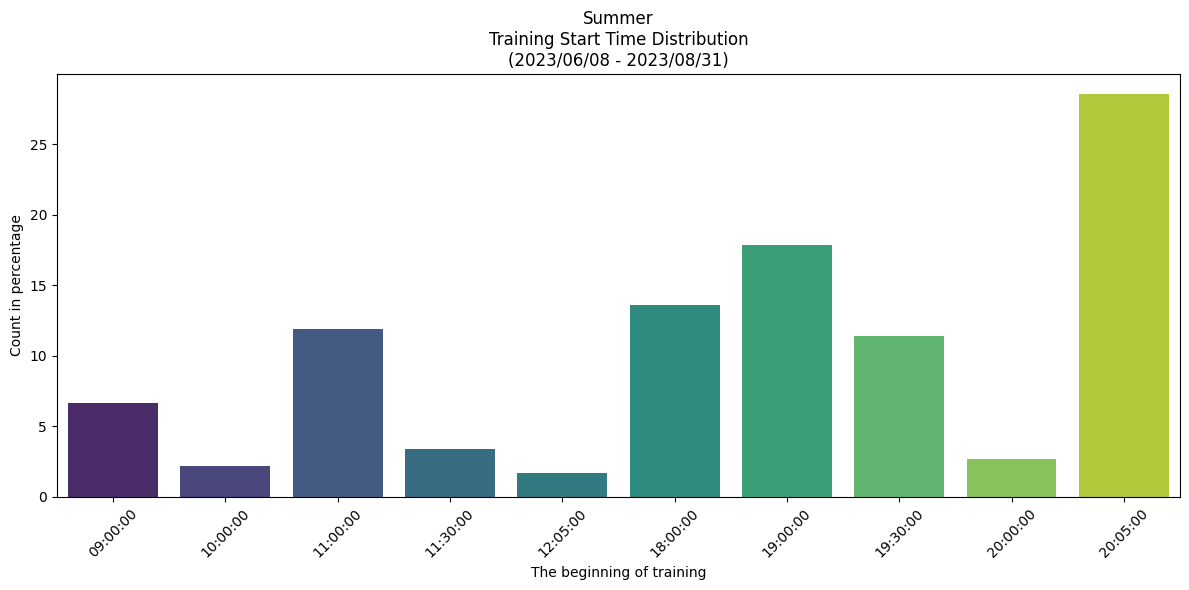

In [28]:
summer = convert_to_datetime_format(summer, ['Start Date & Time'])

only_happened_events = summer[summer['Canceled'] == False]

training_time = pd.DataFrame(index = only_happened_events.index)
training_time['start_hour_minute'] = only_happened_events['Start Date & Time'].dt.time
time_counts = pd.DataFrame(training_time['start_hour_minute'].value_counts().sort_index())
time_counts['percentage'] = round(time_counts['count'] / time_counts['count'].sum() * 100, 2)

plot_distribution(time_counts, x='start_hour_minute', y='percentage', title='Summer\nTraining Start Time Distribution\n(2023/06/08 - 2023/08/31)',
                  x_label='The beginning of training', y_label='Count in percentage')

#### Autumn

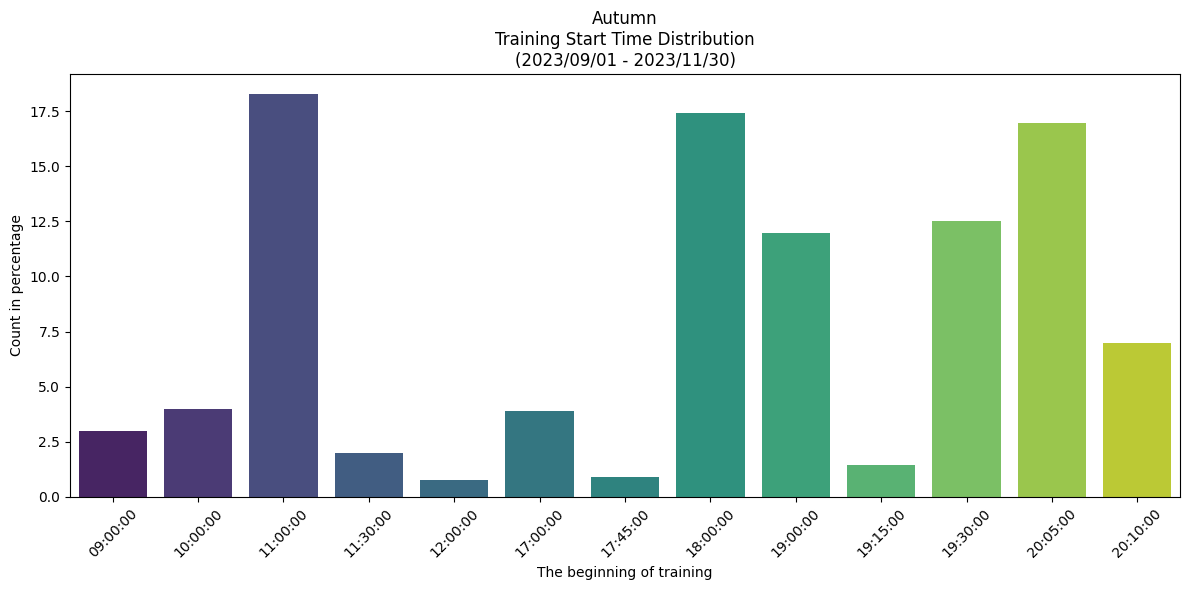

In [29]:
autumn = convert_to_datetime_format(autumn, ['Start Date & Time'])

only_happened_events = autumn[autumn['Canceled'] == False]

training_time = pd.DataFrame(index = only_happened_events.index)
training_time['start_hour_minute'] = only_happened_events['Start Date & Time'].dt.time
time_counts = pd.DataFrame(training_time['start_hour_minute'].value_counts().sort_index())
time_counts['percentage'] = round(time_counts['count'] / time_counts['count'].sum() * 100, 2)

plot_distribution(time_counts, x='start_hour_minute', y='percentage', title='Autumn\nTraining Start Time Distribution\n(2023/09/01 - 2023/11/30)',
                  x_label='The beginning of training', y_label='Count in percentage')

#### Winter

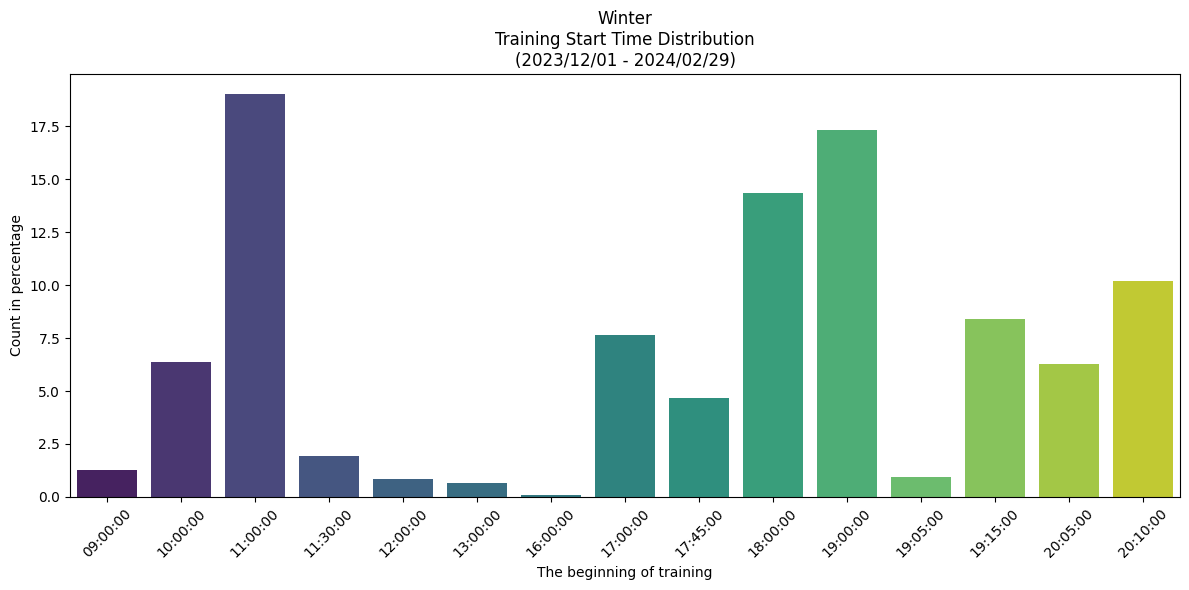

In [30]:
winter = convert_to_datetime_format(winter, ['Start Date & Time'])

only_happened_events = winter[winter['Canceled'] == False]

training_time = pd.DataFrame(index = only_happened_events.index)
training_time['start_hour_minute'] = only_happened_events['Start Date & Time'].dt.time
time_counts = pd.DataFrame(training_time['start_hour_minute'].value_counts().sort_index())
time_counts['percentage'] = round(time_counts['count'] / time_counts['count'].sum() * 100, 2)

plot_distribution(time_counts, x='start_hour_minute', y='percentage', title='Winter\nTraining Start Time Distribution\n(2023/12/01 - 2024/02/29)',
                  x_label='The beginning of training', y_label='Count in percentage')

#### Spring

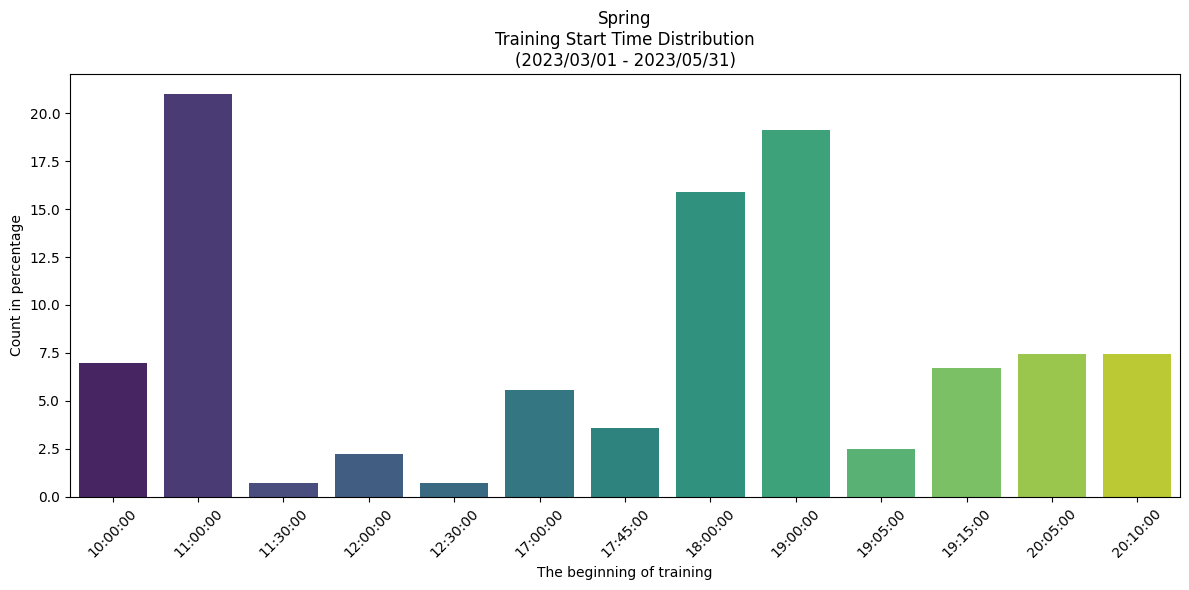

In [31]:
spring = convert_to_datetime_format(spring, ['Start Date & Time'])

only_happened_events = spring[spring['Canceled'] == False]

training_time = pd.DataFrame(index = only_happened_events.index)
training_time['start_hour_minute'] = only_happened_events['Start Date & Time'].dt.time
time_counts = pd.DataFrame(training_time['start_hour_minute'].value_counts().sort_index())
time_counts['percentage'] = round(time_counts['count'] / time_counts['count'].sum() * 100, 2)

plot_distribution(time_counts, x='start_hour_minute', y='percentage', title='Spring\nTraining Start Time Distribution\n(2023/03/01 - 2023/05/31)',
                  x_label='The beginning of training', y_label='Count in percentage')